In [30]:
%matplotlib inline

In [31]:
# Import Libraries

from __future__ import unicode_literals, division

import IPython
import warnings
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import ggplot
from mpl_toolkits.mplot3d import Axes3D

from pylab import *
from IPython.display import HTML
from IPython.display import display as prnt

# Notebook Options
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

# Matplotlib Styles
c = {'axes.labelsize': 17,
'axes.titlesize': 16,
'figure.figsize': [18, 8],
'grid.linewidth': 1.6,
'legend.fontsize': 17,
'lines.linewidth': 2,
'lines.markeredgewidth': 0.0,
'lines.markersize': 11,
'patch.linewidth': 0.5,
'xtick.labelsize': 16,
'xtick.major.pad': 20,
'xtick.major.width': 2,
'xtick.minor.width': 1,
'ytick.labelsize': 16.0,
'ytick.major.pad': 20,
'ytick.major.width': 2,
'ytick.minor.width': 1 }
wide_c = dict(c, **{'figure.figsize':[20,8]})

In [32]:
# Set File Parameters

DATA_DIR = '../data/Project/'
TRAIN_FILE = DATA_DIR + '1.csv'

In [33]:
#The data file has no header so creating an array of headers to add to the dataframe
header = [u'sequence number', u'x acceleration', u'y acceleration', u'z acceleration', u'label']

df = pd.read_csv(TRAIN_FILE, header =None)
df.columns = header

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162501 entries, 0 to 162500
Data columns (total 5 columns):
sequence number    162501 non-null float64
x acceleration     162501 non-null int64
y acceleration     162501 non-null int64
z acceleration     162501 non-null int64
label              162501 non-null int64
dtypes: float64(1), int64(4)
memory usage: 7.4 MB


In [34]:
df.describe()

,sequence number,x acceleration,y acceleration,z acceleration,label
count,162501.000000,162501.000000,162501.000000,162501.000000,162501.000000
mean,81250.000000,1910.670857,2380.286367,2041.214829,4.899681
std,46910.142472,40.653208,41.925728,59.529406,2.424311
min,0.000000,1455.000000,1697.000000,1644.000000,0.000000
25%,40625.000000,1886.000000,2374.000000,1991.000000,3.000000
50%,81250.000000,1905.000000,2381.000000,2022.000000,7.000000
75%,121880.000000,1935.000000,2386.000000,2101.000000,7.000000
max,162500.000000,2356.000000,2713.000000,2739.000000,7.000000


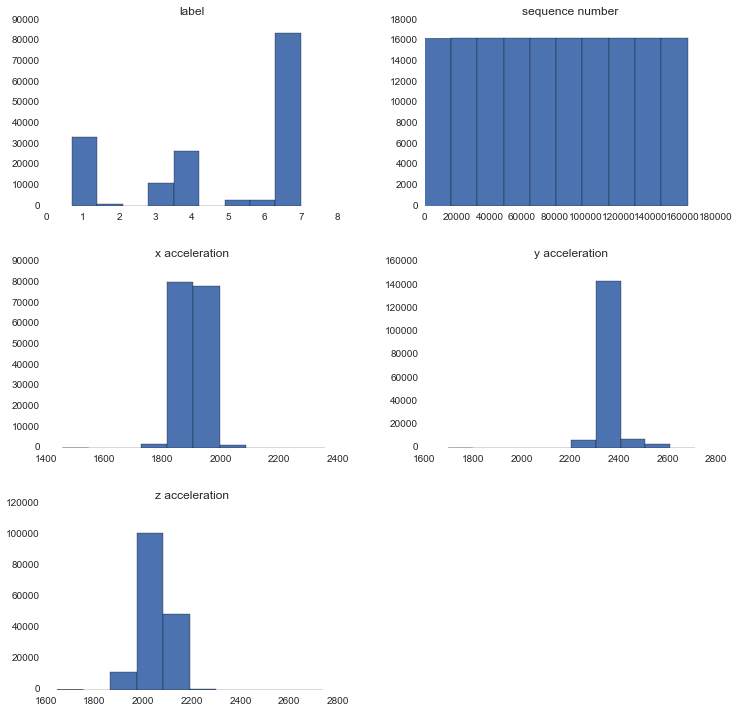

In [35]:
# Show histogram of spread of values of data

df.hist(figsize=(12,12));

## The sample above is skewed heavily towards label 7 activity so I plan to look at other files to see what the data samples look like

In [36]:
TRAIN_FILE2 = DATA_DIR + '2.csv'

df2 = pd.read_csv(TRAIN_FILE2, header =None)
df2.columns = header

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138001 entries, 0 to 138000
Data columns (total 5 columns):
sequence number    138001 non-null float64
x acceleration     138001 non-null int64
y acceleration     138001 non-null int64
z acceleration     138001 non-null int64
label              138001 non-null int64
dtypes: float64(1), int64(4)
memory usage: 6.3 MB


In [37]:
df2.describe()

,sequence number,x acceleration,y acceleration,z acceleration,label
count,138001.000000,138001.000000,138001.000000,138001.000000,138001.000000
mean,69000.000000,2082.035877,2326.237948,1917.805770,3.669698
std,39837.601661,89.664941,73.010098,109.799316,2.342484
min,0.000000,1094.000000,2.000000,2.000000,0.000000
25%,34500.000000,1982.000000,2286.000000,1836.000000,1.000000
50%,69000.000000,2119.000000,2339.000000,1962.000000,3.000000
75%,103500.000000,2148.000000,2352.000000,1987.000000,6.000000
max,138000.000000,3625.000000,4094.000000,4094.000000,7.000000


In [38]:
df2.head()

,sequence number,x acceleration,y acceleration,z acceleration,label
0,0,1984,1998,1645,1
1,1,1984,2003,1653,1
2,2,1987,2002,1648,1
3,3,1990,2001,1650,1
4,4,1992,2000,1657,1


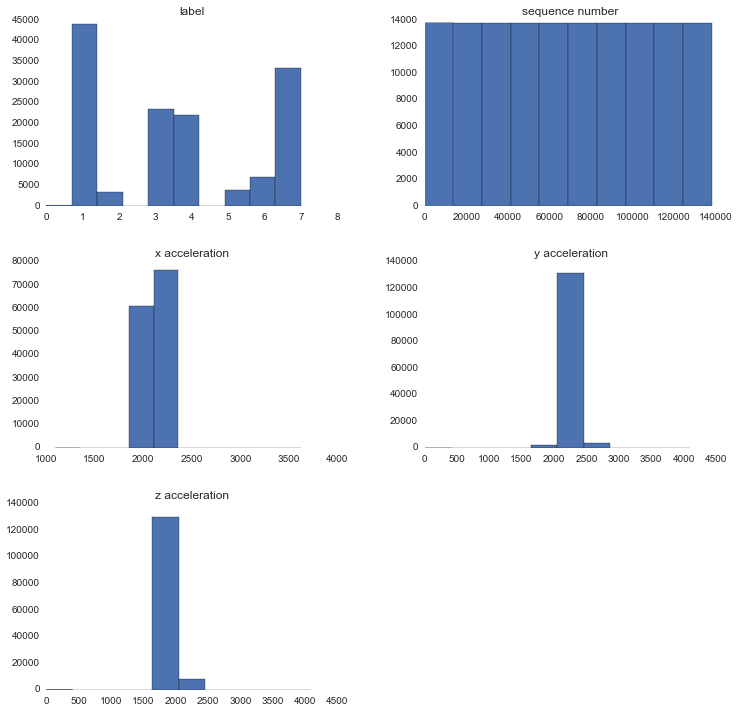

In [39]:
df2.hist(figsize=(12,12));

## The samples of 2, 3 and 5 are very underrepresented in this file so I decided to look at a few more distributions

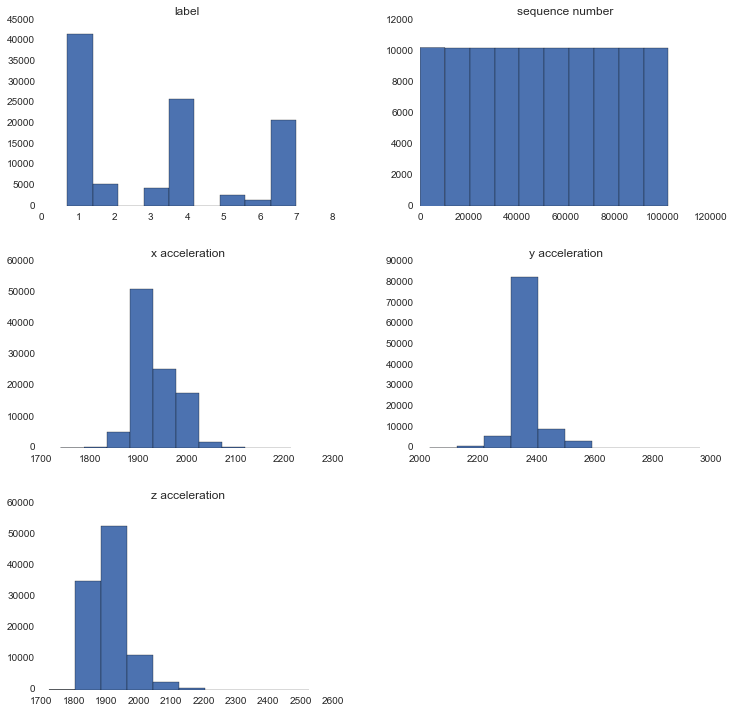

In [40]:
TRAIN_FILE3 = DATA_DIR + '3.csv'

df3 = pd.read_csv(TRAIN_FILE3, header =None)
df3.columns = header

df3.hist(figsize=(12,12));

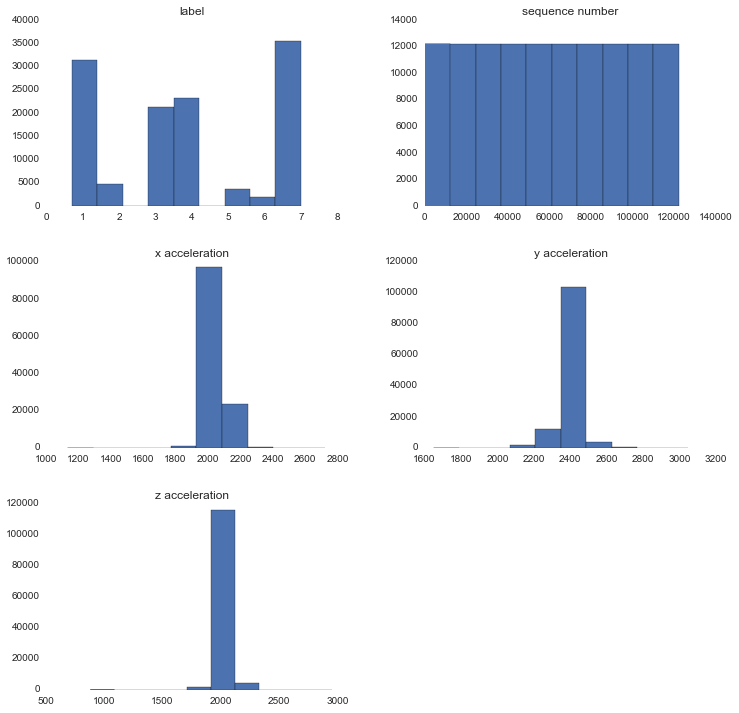

In [41]:
TRAIN_FILE4 = DATA_DIR + '4.csv'

df4 = pd.read_csv(TRAIN_FILE4, header =None)
df4.columns = header

df4.hist(figsize=(12,12));

## After looking at the data spread, I decided to combine all the files and then build the test and training data set from there.

In [42]:
DATA_DIR = '../data/Project/'
file_list = ['../data/Project/1.csv', '../data/Project/2.csv', '../data/Project/3.csv', '../data/Project/4.csv', '../data/Project/5.csv', '../data/Project/6.csv', '../data/Project/7.csv', '../data/Project/8.csv', '../data/Project/9.csv','../data/Project/10.csv', '../data/Project/11.csv', '../data/Project/12.csv', '../data/Project/13.csv', '../data/Project/14.csv', '../data/Project/15.csv']
with open(DATA_DIR + 'activity_agg.csv', 'a') as output_file:
        # the first CSV might contain headers, so write every line
        for line in open(file_list[0]):
            # write each line into output_file
            output_file.write(line)
        # now the rest:
        for file_name in file_list[1:]:
            # open the CSV file, as f
            f = open(file_name)
            # then write each line into the output_file again
            for line in f:
                 output_file.write(line)


In [43]:
ACT_TRAIN_FILE = DATA_DIR + 'activity_agg.csv'

act = pd.read_csv(ACT_TRAIN_FILE, header =None)
act.columns = header

act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4016293 entries, 0 to 4016292
Data columns (total 5 columns):
sequence number    float64
x acceleration     int64
y acceleration     int64
z acceleration     int64
label              int64
dtypes: float64(1), int64(4)
memory usage: 183.9 MB


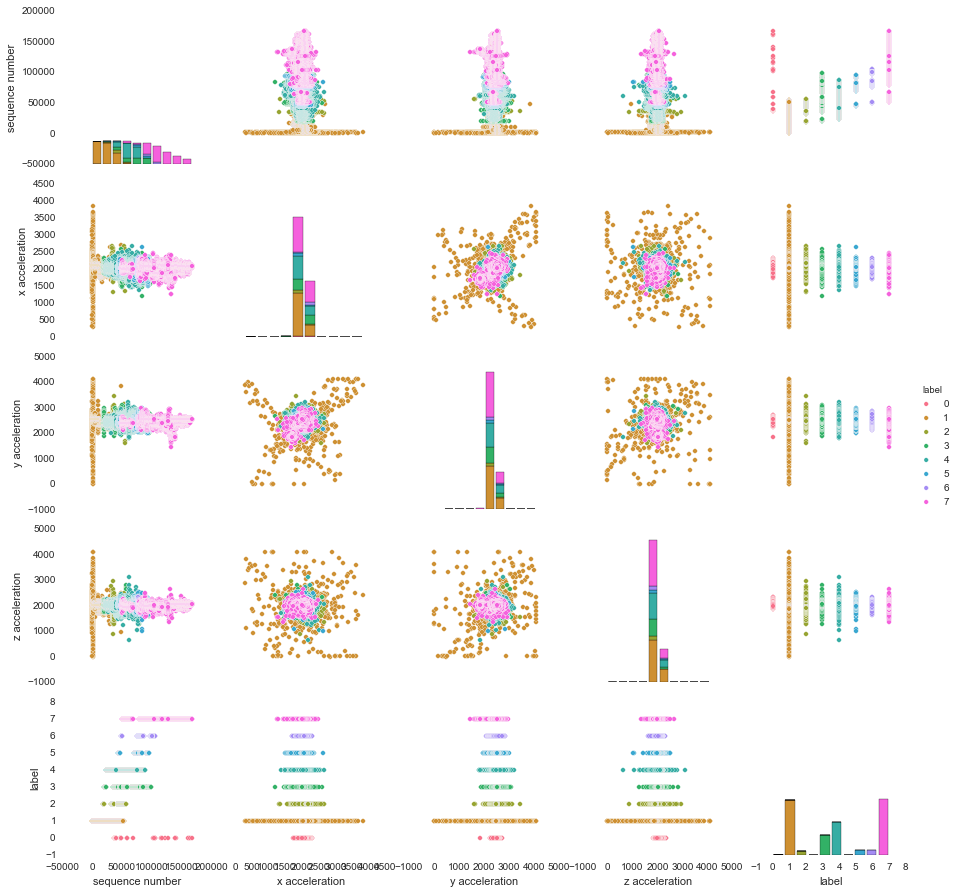

In [44]:
sns.pairplot(act, hue="label", size=2.5);

## Since I am attempting to classify these points, my goal is to use random forests

In [ ]:
## Set up libraries for random forest tree methods

import numpy as np
import matplotlib.pyplot as plt

from sklearn import clone
from sklearn.datasets import load_iris
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.externals.six.moves import xrange
from sklearn.tree import DecisionTreeClassifier